In [7]:
import os
os.chdir(r"C:\Users\arunk\FraudDetection")

In [3]:
from fraudDetection.exception import FraudDetectionException
from fraudDetection.logger import  logging
import sys
import pandas as pd
from fraudDetection.components import DataIngestion, DataValidation
from fraudDetection.entity import *
from fraudDetection.constants import *
import matplotlib.pyplot as plt
import seaborn as sns


c:\Users\arunk\FraudDetection\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
from pathlib import Path
raw_data= Path(r"artifacts\data_ingestion\raw_data\PS_20174392719_1491204439457_log.csv")
data_df = pd.read_csv(raw_data)

In [7]:
data_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data_df.value_counts()

step  type      amount      nameOrig     oldbalanceOrg  newbalanceOrig  nameDest     oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
1     CASH_IN   270.78      C619985571   4184966.65     4185237.43      C875917495   3019.00         0.00            0        0                 1
306   CASH_OUT  220427.13   C1029846599  0.00           0.00            C129321077   882543.64       1102970.77      0        0                 1
                221047.89   C644407995   13756.00       0.00            C1396283314  9082.00         0.00            0        0                 1
                221009.03   C74685400    102768.00      0.00            C1714223283  767644.73       988653.76       0        0                 1
                220986.46   C540058568   9141.00        0.00            C1344091292  0.00            220986.46       0        0                 1
                                                                                                                                 

In [7]:
type = data_df['type'].value_counts()
transactions = type.index
print(type,"\n\n",transactions)
quantity = type.values
import plotly.express as px
figure = px.pie(data_df,
    values=quantity,
    names=transactions,
    hole=0.5,
    title="Distribution of Transaction Type")
figure.show()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64 

 Index(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'], dtype='object')


In [8]:
# finding correlation between target variable and independant variable
correlation =data_df.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [39]:
data_df_numeric = data_df.select_dtypes(exclude='O')
data_df_numeric_col =data_df_numeric.columns.to_list()
df_non_numeric_col = data_df.select_dtypes(include="O").columns.to_list()

In [10]:
data_df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [62]:
import pandas as pd


dtypes_groups = data_df.columns.to_series().groupby(data_df.dtypes)

# create dictionary of dtypes and columns
dtypes_dict = {}
for dtype, col_names in dtypes_groups:
    dtypes_dict[str(dtype)] = list(col_names)

# print the dictionary
print(dtypes_dict)

{'int32': ['type_encoded'], 'int64': ['step', 'isFraud', 'isFlaggedFraud'], 'float64': ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], 'object': ['type', 'nameOrig', 'nameDest']}


In [12]:
dtypes_dict["int64"]

['step', 'isFraud', 'isFlaggedFraud']

In [13]:
teset = data_df.columns.groupby(data_df.dtypes) 

In [14]:
import numpy as np
for kye in teset.keys():
    print(str(teset[kye].to_list()),str(dtype))

['step', 'isFraud', 'isFlaggedFraud'] object
['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'] object
['type', 'nameOrig', 'nameDest'] object


Visualization

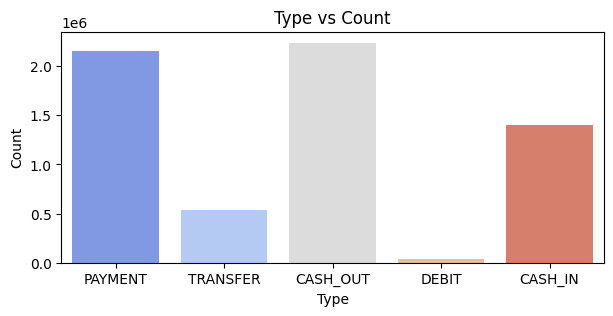

In [18]:
plt.figure(figsize=(7,3))
plt.title("Type vs Count")
sns.countplot(data=data_df,x='type',palette='coolwarm')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

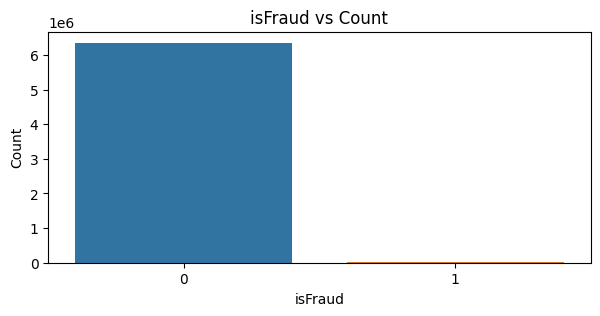

In [19]:
plt.figure(figsize=(7,3))
plt.title('isFraud vs Count')
sns.countplot(data=data_df,x='isFraud')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()

In [21]:
# Let's look at the percentage of each category in isFraud column(target column)
print("No Frauds:",data_df['isFraud'].value_counts()[0]/len(data_df['isFraud'])*100)
print("Frauds:",data_df['isFraud'].value_counts()[1]/len(data_df['isFraud'])*100)

No Frauds: 99.87091795518198
Frauds: 0.12908204481801522


In [16]:
data_df_numeric_col[:-1]

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud']

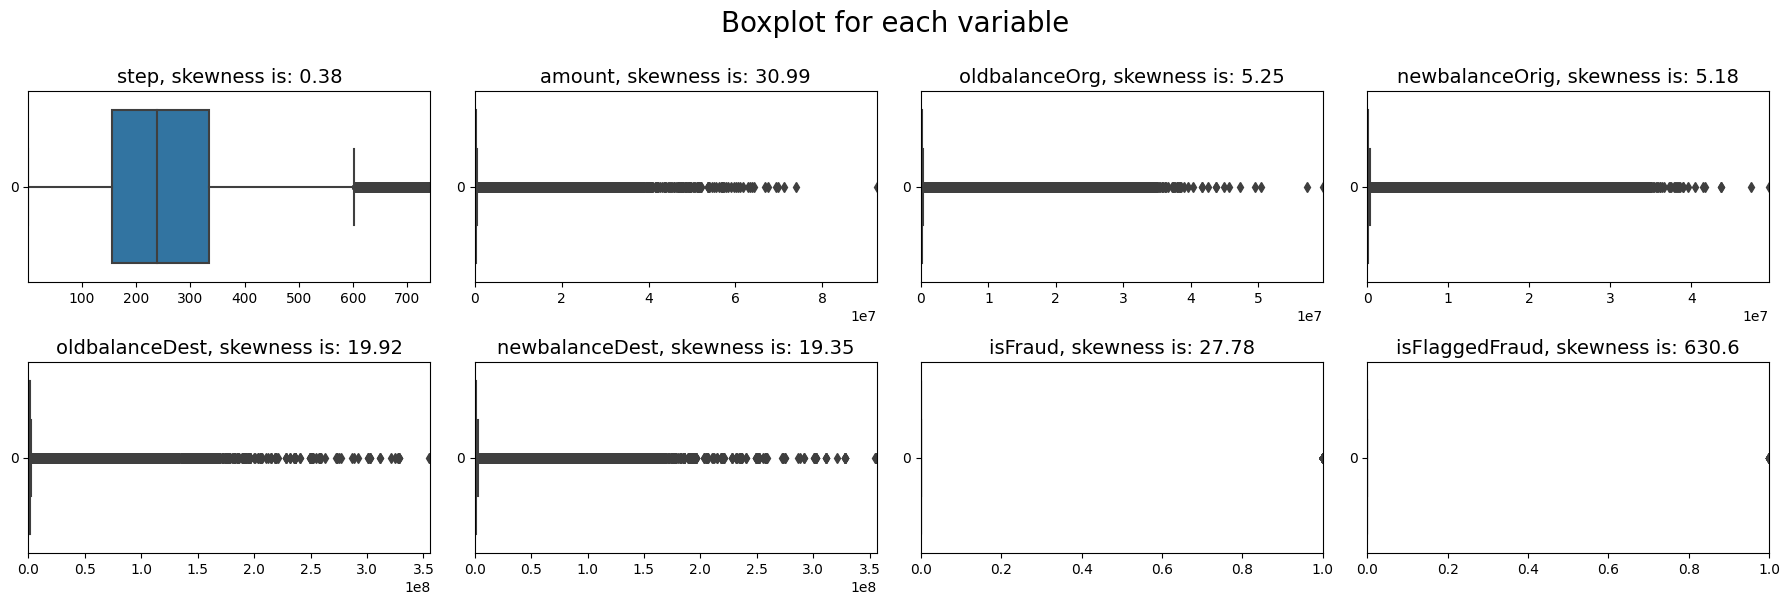

In [26]:
def boxplots_visual(data,column):
    fig,ax = plt.subplots(2,4,figsize=(18,6))
    fig.suptitle('Boxplot for each variable', y=1, size=20)
    ax=ax.flatten()
    for i, feature in enumerate(column):
        sns.boxplot(data=data_df[feature],ax=ax[i],orient='horizontal')
        ax[i].set_title(feature+', skewness is: ' + str(round(data[feature].skew(axis=0,skipna=True),2)),fontsize=14)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])

boxplots_visual(data=data_df,column=data_df_numeric_col)
plt.tight_layout()

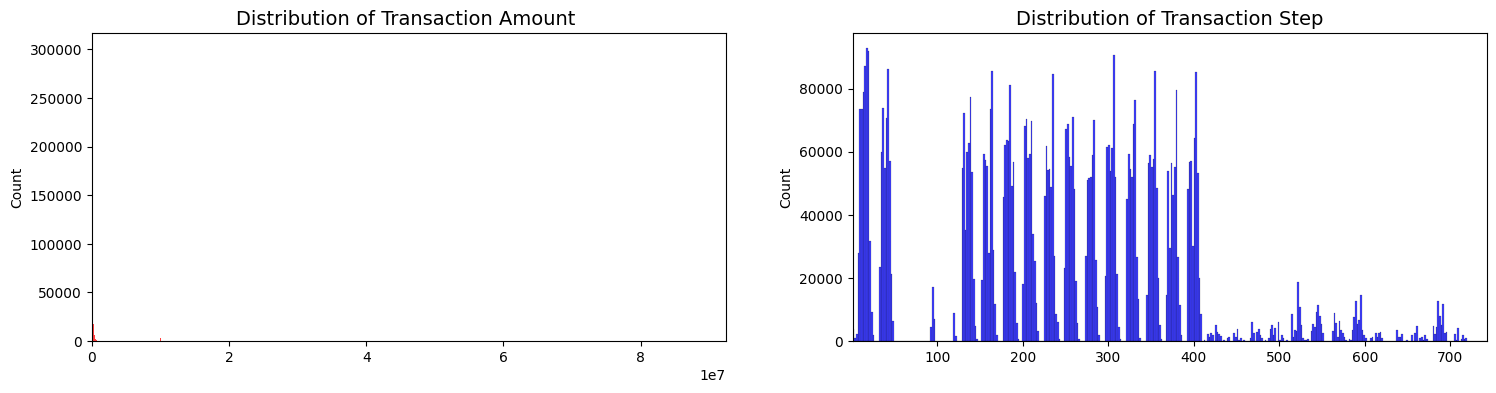

In [28]:
import seaborn as sns
fig, ax = plt.subplots(1,2,figsize=(18,4))
amount_val = data_df['amount'].values
time_val = data_df['step'].values

sns.histplot(amount_val, ax=ax[0], color='r')
ax[0].set_title("Distribution of Transaction Amount ", fontsize=14)
ax[0].set_xlim(min(amount_val),max(amount_val))
sns.histplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Step', fontsize=14)
ax[1].set_xlim(min(time_val),max(time_val))
plt.show()

1    8213
Name: isFraud, dtype: int64


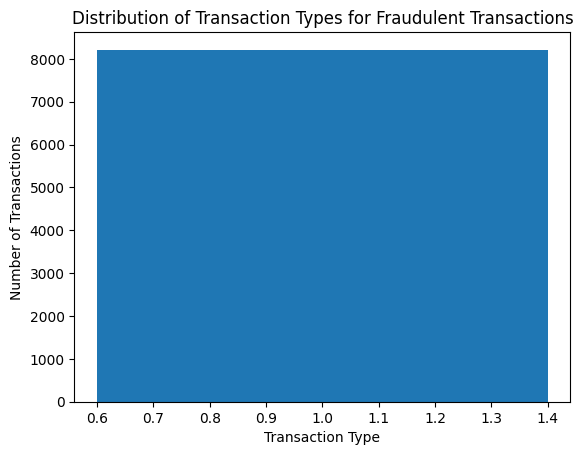

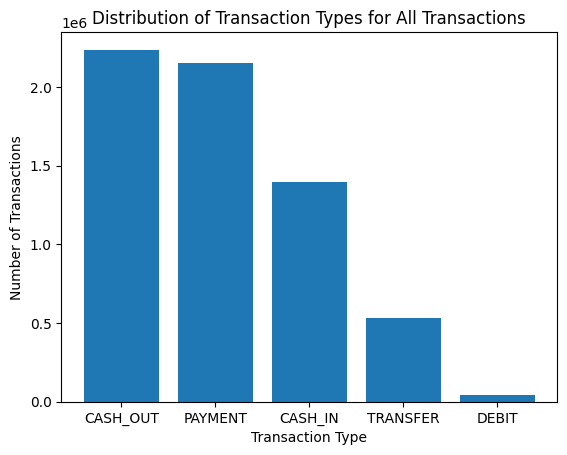

In [33]:
#  compare the distribution of type feature for fraudulent and non-fraudulent transactions:
# Count the number of occurrences of each transaction type in the filtered dataset

fraudulent_data_df = data_df[data_df['isFraud'] == 1]
fraudulent_data_df_counts = fraudulent_data_df['isFraud'].value_counts()
print(fraudulent_data_df_counts)
# Create a bar chart to visualize the distribution of transaction types in the filtered dataset
plt.bar(fraudulent_data_df_counts.index, fraudulent_data_df_counts.values)
plt.title('Distribution of Transaction Types for Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.show()

# Count the number of occurrences of each transaction type in the entire dataset
all_counts = data_df['type'].value_counts()

# Create a bar chart to visualize the distribution of transaction types in the entire dataset
plt.bar(all_counts.index, all_counts.values)
plt.title('Distribution of Transaction Types for All Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.show()

In [17]:
# Conditional probability given the type of transactions.

# Count the number of transactions of each type
type_counts = data_df['type'].value_counts()

# Count the number of fraudulent transactions of each type
type_fraud_counts = data_df.loc[data_df['isFraud'] == 1, 'type'].value_counts()

# Calculate the conditional probabilities of fraud given a transaction type
fraud_given_type = type_fraud_counts / type_counts

# Calculate the conditional probabilities of a transaction type given fraud
type_given_fraud = type_fraud_counts / data_df['isFraud'].sum()

print("Fraud given Transaction Type:")
print(fraud_given_type)

print("Transaction Type given Fraud:")
print(type_given_fraud)


Fraud given Transaction Type:
CASH_IN          NaN
CASH_OUT    0.001840
DEBIT            NaN
PAYMENT          NaN
TRANSFER    0.007688
Name: type, dtype: float64
Transaction Type given Fraud:
CASH_OUT    0.501157
TRANSFER    0.498843
Name: type, dtype: float64


In [34]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_df['type_encoded'] = le.fit_transform(data_df['type'])

ct = pd.crosstab(data_df['isFraud'], data_df['type'])
print(ct)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(ct)
print("Chi-squared test statistics: ", chi2)
print("p-value:", p)

#Calculate Cramer's V
from scipy.stats import cramervonmises_2samp

v = cramervonmises_2samp(data_df['isFraud'],data_df['type_encoded'])
print("Cramer's V:", v)

type     CASH_IN  CASH_OUT  DEBIT  PAYMENT  TRANSFER
isFraud                                             
0        1399284   2233384  41432  2151495    528812
1              0      4116      0        0      4097
Chi-squared test statistics:  22082.53571319108
p-value: 0.0
Cramer's V: CramerVonMisesResult(statistic=861709.8684681067, pvalue=1.0434185909624638e-05)


In [ ]:
# relationship between the "isFraud" variable and the "type" variable using a contingency table and a stacked bar chart:
# Plot stacked bar chart
ct.plot(kind='bar', stacked=True)

# Add axis labels and legend
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.legend(title='Type', loc='upper right')

# Show plot
plt.show()

Conclusion:

1. The target feature having 2 class (0,1): 
    - is higly imbalanced with IsFraud=1 (No fraud transactions)
        No Frauds: 99.87091795518198
        Frauds: 0.12908204481801522

2. The dataset has features with 3 datatypes:
    - 'int64': ['step', 'isFraud', 'isFlaggedFraud']
    - 'float64': ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
    - 'object': ['type', 'nameOrig', 'nameDest']
    
3. The count of unique class in each feature are
    step                  743
    type                    5
    amount            5316900
    nameOrig          6353307
    oldbalanceOrg     1845844
    newbalanceOrig    2682586
    nameDest          2722362
    oldbalanceDest    3614697
    newbalanceDest    3555499
    isFraud                 2
    isFlaggedFraud          2
4. The type has 5 class:
    - ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'] which can be converted to numeric feature
5. The dataset is positively skewed indicating there are outliers in the features:
    - amount +30 This also indicates an extremely positively skewed distribution, even more so than the previous value. The distribution has an extremely long tail on the positive side of the mean, indicating that there may be a very large number of outliers or extreme values in the data.
    - oldbalanceOrg and newbalanceOrig +19: This indicates an extremely positively skewed distribution. The distribution has an extremely long tail on the positive side of the mean, indicating that there may be a large number of outliers or extreme values in the data.
6.  Correlation
    - 'amount' has the highest absolute correlation with 'isFraud', with a coefficient of 0.076. This suggests that there may be some relationship between the transaction amount and the likelihood of fraud, but the correlation is relatively weak.
    - The other numerical variables ('oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', and 'newbalanceDest') have correlations with 'isFraud' ranging from -0.005 to 0.0005, indicating that there is little to no linear relationship between these variables and the likelihood of fraud.
7. Based on the contingency table, we can observe that fraudulent transactions only occurred in the 'CASH_OUT' and 'TRANSFER' types of transactions. 
    - This can be interpreted by looking at the row with 'isFraud' equal to 1, where we see that there are no fraudulent transactions in the other three types.
    - The chi-squared test statistic of 22082.5357 indicates that there is a statistically significant association between the 'type' and 'isFraud' variables. The p-value of 0.0 indicates that the association is not likely due to chance.
    - Cramer's V coefficient of 861709.8685 and its corresponding p-value of 1.0434e-05 also suggest a strong association between the two variables. Cramer's V is a measure of association between two nominal variables, where a value of 0 indicates no association and a value of 1 indicates a perfect association. The small p-value suggests that the association is statistically significant.
8. 

In [22]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit_transform(data_df)

<6362620x26091947 sparse matrix of type '<class 'numpy.float64'>'
	with 69988820 stored elements in Compressed Sparse Row format>

In [21]:
data_df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [17]:
from box import ConfigBox

df = data_df.copy()
# Applying onehot encoding on type column
df=pd.get_dummies(data=df,columns=['type'],drop_first=True)

def get_dtypes(df) -> ConfigBox:
    dtypes_groups = df.columns.to_series().groupby(df.dtypes)

    # create dictionary of dtypes and columns
    dtypes_dict = {}
    for dtype, col_names in dtypes_groups:
        dtypes_dict[str(dtype)] = list(col_names)

    # print the dictionary
    print(dtypes_dict)
    return dtypes_dict
col_dtypes  = get_dtypes(df)
col_dtypes['object']

{'uint8': ['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'], 'int64': ['step', 'isFraud', 'isFlaggedFraud'], 'float64': ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], 'object': ['nameOrig', 'nameDest']}


['nameOrig', 'nameDest']

In [76]:
# Based on our observation in point 7 of conclusion we are using onehot encoding. so as to extract the data with cash_out and transfer transaction for our training and testing 

# Dropping columns that are not needed
df.drop(columns=dtypes_dict['object']+dtypes_dict['int32']+['isFlaggedFraud'],axis=1,inplace=True)

data

In [78]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,3.516633e-01,6.511783e-03,3.381461e-01,8.375622e-02
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,4.774895e-01,8.043246e-02,4.730786e-01,2.770219e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [37]:
print(df.max(axis=0))
print(df.min(axis=0))

step                       743
type                  TRANSFER
amount             92445516.64
nameOrig            C999999784
oldbalanceOrg      59585040.37
newbalanceOrig     49585040.37
nameDest            M999999784
oldbalanceDest    356015889.35
newbalanceDest    356179278.92
isFraud                      1
isFlaggedFraud               1
type_encoded                 4
dtype: object
step                        1
type                  CASH_IN
amount                    0.0
nameOrig          C1000000639
oldbalanceOrg             0.0
newbalanceOrig            0.0
nameDest          C1000004082
oldbalanceDest            0.0
newbalanceDest            0.0
isFraud                     0
isFlaggedFraud              0
type_encoded                0
dtype: object


Since range of values in feature amount, oldbalanceOrg, newbalanceOrg oldbalanceDest newbalanceDest is wide we can consider scaling.

In [79]:
# <!-- Applying feature extraction and feature selection technique: -->

# We are using RobustScaler to scale down the numerical features as RobustScaler is less prone to outliers
from sklearn.preprocessing import RobustScaler
scale=RobustScaler()
for feature in df.columns:
    df[feature]=scale.fit_transform(df[feature].values.reshape(-1,1))
df.head()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.329609,-0.332932,1.452991,1.111175,-0.140722,-0.193057,0.0,0.0,0.0,1.0,0.0
1,-1.329609,-0.373762,0.065610,0.134375,-0.140722,-0.193057,0.0,0.0,0.0,1.0,0.0
2,-1.329609,-0.382380,-0.130708,0.000000,-0.140722,-0.193057,1.0,0.0,0.0,0.0,1.0
3,-1.329609,-0.382380,-0.130708,0.000000,-0.118260,-0.193057,1.0,1.0,0.0,0.0,0.0
4,-1.329609,-0.323571,0.254820,0.207169,-0.140722,-0.193057,0.0,0.0,0.0,1.0,0.0


Feature Extraction 

    -using ExtraTreesRegressor
    - Corr matrix
    -Recursive feature elimination:

In [80]:
# Splitting our data into independent and dependent features
x=df.drop('isFraud',axis=1)
y=df['isFraud']

# Feature Importance
# using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

[0.13533701 0.25543877 0.27509376 0.07841211 0.05411782 0.18832316
 0.00813198 0.         0.         0.00514537]


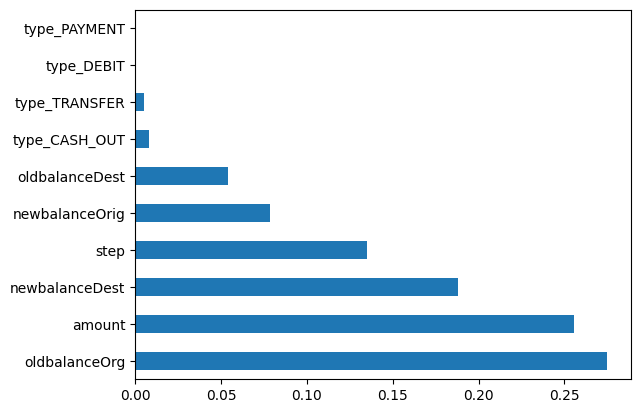

In [81]:
# plot graph of feature importance for better visualization
feat_importance = pd.Series(model.feature_importances_,index=x.columns)

feat_importance.nlargest(10).plot(kind='barh')
plt.show()

In [83]:
top_10 = feat_importance.nlargest(10)
feature_selected = top_10[top_10>0].index.tolist()

['oldbalanceOrg',
 'amount',
 'newbalanceDest',
 'step',
 'newbalanceOrig',
 'oldbalanceDest',
 'type_CASH_OUT',
 'type_TRANSFER']

In [88]:
#using Correlation Matrix
threshold = 0.01
corr_matrix = df.corr()
corr_with_target = corr_matrix['isFraud'].abs()
important_features = corr_with_target[corr_with_target > threshold].index.tolist()
important_features

['step',
 'amount',
 'oldbalanceOrg',
 'isFraud',
 'type_CASH_OUT',
 'type_PAYMENT',
 'type_TRANSFER']

In [91]:
#using Recursive feature elimination:
# This method recursively removes the least important features based on a model's coefficient weights until a specified number of features remain.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=8)
rfe.fit(x, y)
important_features = x.columns[rfe.support_].tolist()
important_features


['oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'type_CASH_OUT',
 'type_DEBIT',
 'type_PAYMENT',
 'type_TRANSFER']

In [92]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
selector = SelectFromModel(model, threshold=threshold)
selector.fit(x, y)
important_features = x.columns[selector.get_support()].tolist()
important_features

Feature Extraction 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(x)

# Evaluate the components
explained_var = pca.explained_variance_ratio_
loadings = pca.components_

print('Explained variance:', explained_var)
print('Loadings:', loadings)

# Use the components
# ... insert code for using components as features in a machine learning model ...


In [ ]:
from scipy.stats import ttest_ind

# Feature engineering
df["oldbalanceDiff"] = df["oldbalanceOrg"] - df["oldbalanceDest"]
df["amountToOldBalanceOrg"] = df["amount"] / df["oldbalanceOrg"]
df["amountToOldBalanceDest"] = df["amount"] / df["oldbalanceDest"]
df["timeSinceLastTransaction"] = df.groupby("nameOrig")["step"].diff().fillna(0)

t_stat, p_val = ttest_ind(df[df["isFraud"] == 1]["amount"], df[df["isFraud"] == 0]["amount"], equal_var=False)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_val}")

In [ ]:
# Example 1: calculate the transaction difference between the old and new balances for each account
df['origDiff'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['destDiff'] = df['oldbalanceDest'] - df['newbalanceDest']

# Example 2: encode the transaction type column as a numerical feature
df['type'] = pd.factorize(df['type'])[0]

# Example 3: calculate the difference between the transaction amount and the average amount for that transaction type
df['avgAmount'] = df.groupby('type')['amount'].transform('mean')
df['amountDiff'] = df['amount'] - df['avgAmount']

# Create a new dataframe with the selected features for the ML model
X = df[['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'origDiff', 'destDiff', 'amountDiff']]

# Create the target variable column
y = df['isFraud']

# Check the final dataframe
print(X.head())

In [ ]:
# Create new features
X_train['transaction_amount_to_mean_card'] = X_train['TransactionAmt'] / X_train.groupby(['card1'])['TransactionAmt'].transform('mean')
X_train['transaction_amount_to_std_card'] = X_train['TransactionAmt'] / X_train.groupby(['card1'])['TransactionAmt'].transform('std')
X_test['transaction_amount_to_mean_card'] = X_test['TransactionAmt'] / X_test.groupby(['card1'])['TransactionAmt'].transform('mean')
X_test['transaction_amount_to_std_card'] = X_test['TransactionAmt'] / X_test.groupby(['card1'])['TransactionAmt'].transform('std')